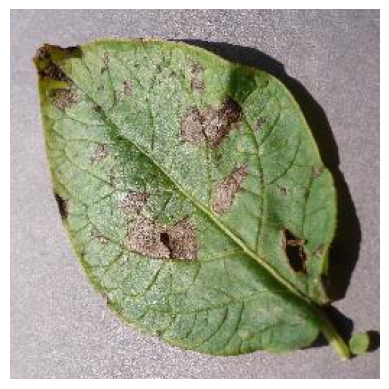

Model loaded successfully.
Available keys in predictions: dict_keys(['output_0'])


KeyError: 'your_correct_output_key_here'

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Specify the absolute path to the image file
image_path = r"C:\Datasets\PlantVillage\Potato___Early_blight\0a8a68ee-f587-4dea-beec-79d02e7d3fa4___RS_Early.B 8461.JPG"

# Load the image using PIL (Python Imaging Library)
try:
    image = Image.open(image_path)
    image = image.resize((256, 256))  # Resize the image to match model input size

    # Convert the image to a NumPy array
    image_array = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension

    # Optionally, you can visualize the loaded image
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Specify the path to the SavedModel directory
    saved_model_path = "./PlantVillage/npmodels/3"

    # Load the SavedModel
    try:
        model = tf.saved_model.load(saved_model_path)
        print("Model loaded successfully.")

        # Perform inference using the model's specific signature
        infer = model.signatures["serving_default"]
        predictions = infer(tf.constant(image_array, dtype=tf.float32))

        # Print available keys in predictions
        print("Available keys in predictions:", predictions.keys())

        # Update to use the correct output key based on your model's output structure
        output_key = 'your_correct_output_key_here'

        # Get the predicted class (assuming it's a classification model)
        predicted_class = tf.argmax(predictions[output_key], axis=-1)

        # Display the predicted class
        print(f"Predicted Class: {predicted_class.numpy()[0]}")

    except OSError as e:
        print(f"Error loading the SavedModel: {e}")

except FileNotFoundError:
    print(f"Error: Image file '{image_path}' not found.")
